# IMPORTACIÓN DE LIBRERIAS

In [8]:
!pip install xgboost

In [9]:
!pip install joblib

In [10]:
!pip install tensorflow

In [11]:
!pip install keras

In [12]:
!pip install lightgbm

# IMPORTACIÓN DE LOS DATOS

In [4]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

In [5]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


# LIGHTGBM

#### TECNICAS DE BALANCEO EN CONJUNTO DE ENTRENAMIENTO Y COMPARACION DE RESULTADOS

[LightGBM] [Info] Number of positive: 65670, number of negative: 1072714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3625
[LightGBM] [Info] Number of data points in the train set: 1138384, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057687 -> initscore=-2.793305
[LightGBM] [Info] Start training from score -2.793305

Medidas de rendimiento para Sin Balanceo:
ROC-AUC: 0.9991
Precision: 0.9762
Recall: 0.9684
F1-Score: 0.9723
Accuracy: 0.9968

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9981  0.9986    0.9983  459735.0000
1                0.9762  0.9684    0.9723   28145.0000
accuracy         0.9968  0.9968    0.9968       0.9968
macro avg        0.9871  0.9835    0.9853  487880.0000
weighted a

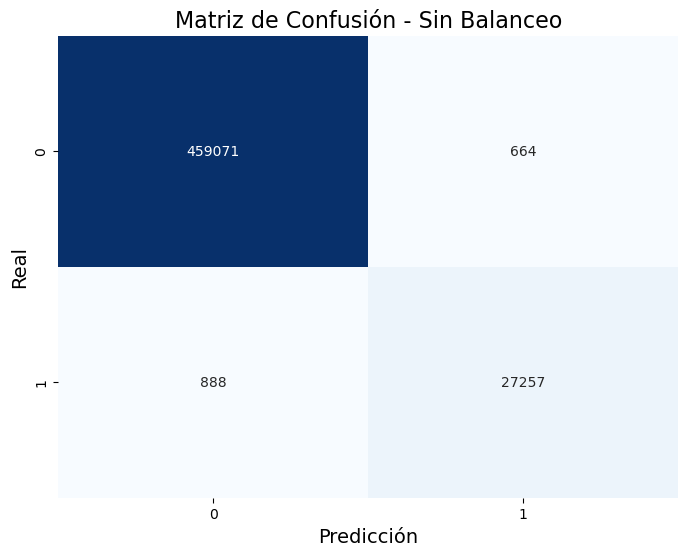

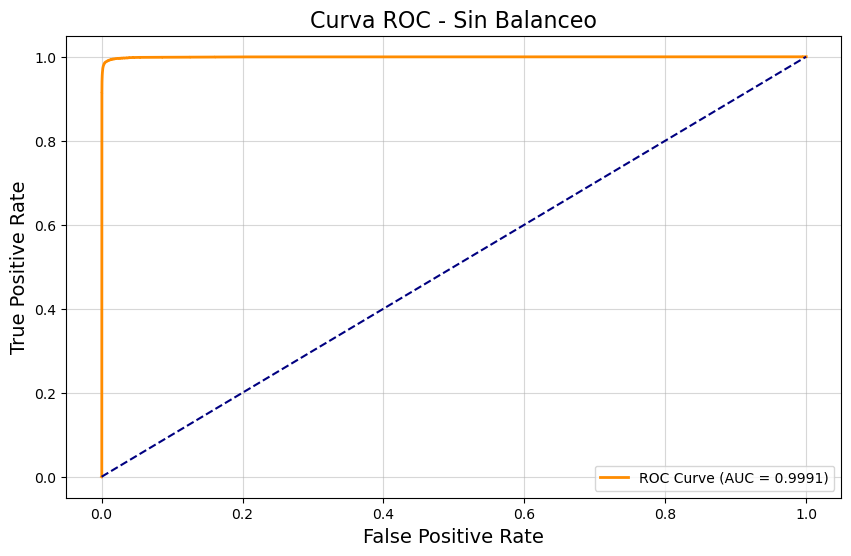

[LightGBM] [Info] Number of positive: 1072714, number of negative: 1072714
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4606
[LightGBM] [Info] Number of data points in the train set: 2145428, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9992
Precision: 0.9585
Recall: 0.9756
F1-Score: 0.9669
Accuracy: 0.9962

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9985  0.9974    0.9980  459735.0000
1                0.9585  0.9756    0.9669   28145.0000
accuracy         0.9962  0.9962    0.9962       0.9962
macro avg        0.9785  0.9865    0.9825  487880.0000
weighted avg     0.9962  0.9962    0.9962  487880.0000


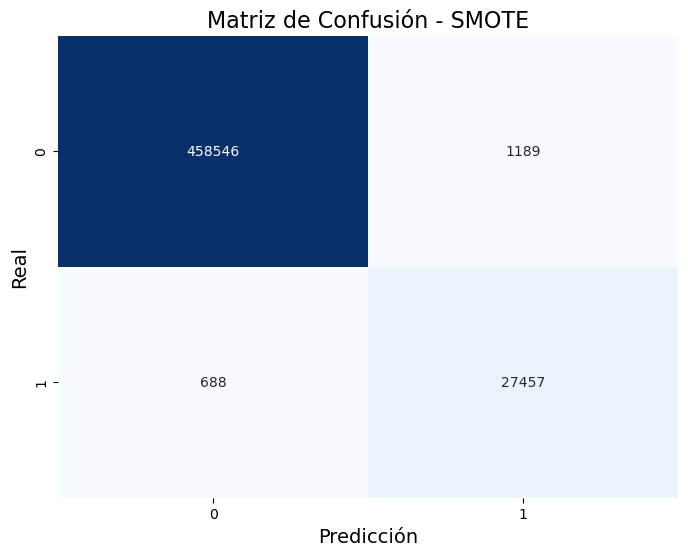

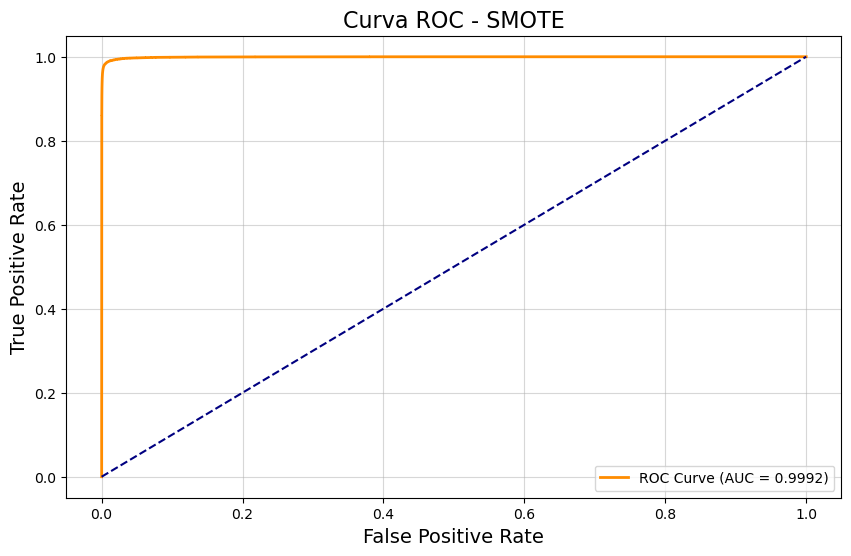

[LightGBM] [Info] Number of positive: 1061922, number of negative: 1061922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.246371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4597
[LightGBM] [Info] Number of data points in the train set: 2123844, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9993
Precision: 0.9591
Recall: 0.9746
F1-Score: 0.9668
Accuracy: 0.9961

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9984  0.9975    0.9979  459735.0000
1                0.9591  0.9746    0.9668   28145.0000
accuracy         0.9961  0.9961    0.9961       0.9961
macro avg        0.9788  0.9860    0.9824  487880.0000
weighted avg     0.9962  0.9961    0.9962  487880.0000


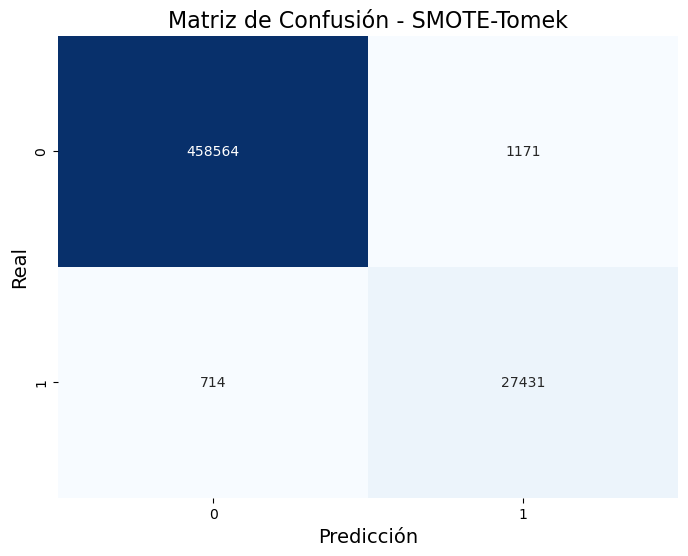

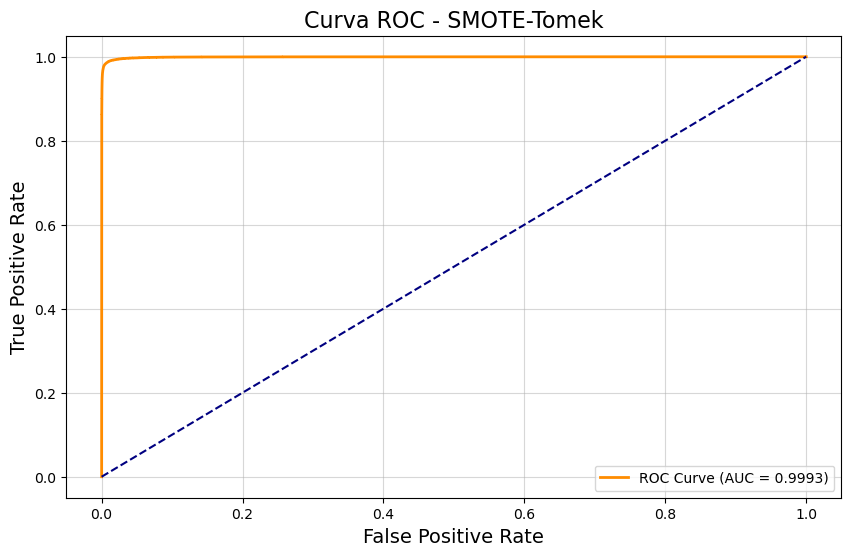


Comparativa de Técnicas de Balanceo:
               roc_auc  precision    recall        f1  accuracy
Sin Balanceo  0.999125   0.976219  0.968449  0.972318  0.996819
SMOTE         0.999248   0.958493  0.975555  0.966949  0.996153
SMOTE-Tomek   0.999272   0.959059  0.974631  0.966782  0.996136


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc,
    f1_score, 
    accuracy_score, 
    precision_score, 
    recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla para reproducibilidad
np.random.seed(42)

# Cargar dataset
df_mora_prestamos_sin_balanceo = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir el conjunto de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Función para entrenar, predecir y evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
    # Entrenar LightGBM
    clf_lgbm = LGBMClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=-1,  # Sin límite de profundidad
        learning_rate=0.1
    )
    clf_lgbm.fit(X_train_balanceado, y_train_balanceado)
    
    # Predicciones
    y_pred_lgbm = clf_lgbm.predict(X_test)
    y_pred_proba_lgbm = clf_lgbm.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    roc_auc = auc(*roc_curve(y_test, y_pred_proba_lgbm)[:2])
    recall = recall_score(y_test, y_pred_lgbm)
    precision = precision_score(y_test, y_pred_lgbm)
    f1 = f1_score(y_test, y_pred_lgbm)
    accuracy = accuracy_score(y_test, y_pred_lgbm)
    
    print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    reporte = classification_report(y_test, y_pred_lgbm, output_dict=True)
    reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
    print(reporte_redondeado)
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_lgbm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lgbm)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# 1. Sin balanceo
resultados_sin_balanceo = evaluar_modelo(X_train, y_train, X_test, y_test, 'Sin Balanceo')

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
resultados_smote = evaluar_modelo(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE')

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
resultados_smote_tomek = evaluar_modelo(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, 'SMOTE-Tomek')

# Comparativa de resultados
comparativa = pd.DataFrame([
    resultados_sin_balanceo,
    resultados_smote,
    resultados_smote_tomek
], index=['Sin Balanceo', 'SMOTE', 'SMOTE-Tomek'])
print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

#### MEJORES HIPERPARAMETROS DE LIGHTGBM- SIN BALANCEO DE DATOS

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7, 9],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Configurar el modelo base
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    verbose=-1
)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = lgb.LGBMClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('mejores_parametros_lightgbm.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 0.6
reg_lambda: 0.1
reg_alpha: 0.1
num_leaves: 127
n_estimators: 900
min_child_samples: 10
max_depth: -1
learning_rate: 0.05
colsample_bytree: 0.6

Mejor score (ROC-AUC): 0.9998

Métricas en conjunto de prueba:
ROC-AUC: 0.9998
Precision: 0.9921
Recall: 0.9787
F1-Score: 0.9853
Accuracy: 0.9983


#### MEJORES HIPERPARAMETROS DE LIGHTGBM - CROSS VALIDATION

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros encontrados
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'num_leaves': 127,
    'n_estimators': 900,
    'min_child_samples': 10,
    'max_depth': -1,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'verbose': -1
}

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []

print(f"Iniciando validación cruzada con {n_splits} folds...")

# Realizar validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Crear y entrenar modelo
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train, y_train)
    
    # Predicciones
    train_pred = model.predict(X_train)
    train_pred_proba = model.predict_proba(X_train)[:, 1]
    
    val_pred = model.predict(X_val)
    val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calcular métricas
    train_metrics = {
        'roc_auc': roc_auc_score(y_train, train_pred_proba),
        'precision': precision_score(y_train, train_pred),
        'recall': recall_score(y_train, train_pred),
        'f1': f1_score(y_train, train_pred),
        'accuracy': accuracy_score(y_train, train_pred)
    }
    
    val_metrics = {
        'roc_auc': roc_auc_score(y_val, val_pred_proba),
        'precision': precision_score(y_val, val_pred),
        'recall': recall_score(y_val, val_pred),
        'f1': f1_score(y_val, val_pred),
        'accuracy': accuracy_score(y_val, val_pred)
    }
    
    train_scores.append(train_metrics)
    val_scores.append(val_metrics)
    
    print("\nMétricas de entrenamiento:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\nMétricas de validación:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

# Crear DataFrame para el resumen
summary_data = {
    'Train Mean': train_means,
    'Train Std': train_stds,
    'Val Mean': val_means,
    'Val Std': val_stds,
    'Diff (Train-Val)': train_means - val_means
}

summary_df = pd.DataFrame(summary_data).round(4)

print("\nResumen de validación cruzada:")
print(summary_df)

# Guardar resultados
summary_df.to_csv('lightgbm_cross_validation_results.csv')

# Evaluar overfitting
print("\nEvaluación de overfitting:")
for metric in train_means.index:
    diff = train_means[metric] - val_means[metric]
    print(f"\n{metric}:")
    print(f"Diferencia Train-Val: {abs(diff):.4f}")
    if abs(diff) > 0.02:
        print("⚠️ Posible overfitting detectado")
    else:
        print("✓ No hay evidencia de overfitting")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
accuracy: 1.0000

Métricas de validación:
roc_auc: 0.9999
precision: 0.9927
recall: 0.9824
f1: 0.9875
accuracy: 0.9986

Fold 2/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
accuracy: 1.0000

Métricas de validación:
roc_auc: 0.9998
precision: 0.9917
recall: 0.9787
f1: 0.9852
accuracy: 0.9983

Fold 3/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
accuracy: 1.0000

Métricas de validación:
roc_auc: 0.9998
precision: 0.9925
recall: 0.9769
f1: 0.9847
accuracy: 0.9982

Fold 4/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
accuracy: 1.0000

Métricas de validación:
roc_auc: 0.9998
precision: 0.9922
recall: 0.9797
f1: 0.9859
accuracy: 0.9984

Fold 5/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 1.0000
recall: 1.0000
f

#### MEJORES HIPERPARAMETROS DE LIGHTGBM - INCORPORACION DE NUEVOS DATOS (VALIDACIÓN)

Cargando datos...

Entrenando modelo LightGBM...


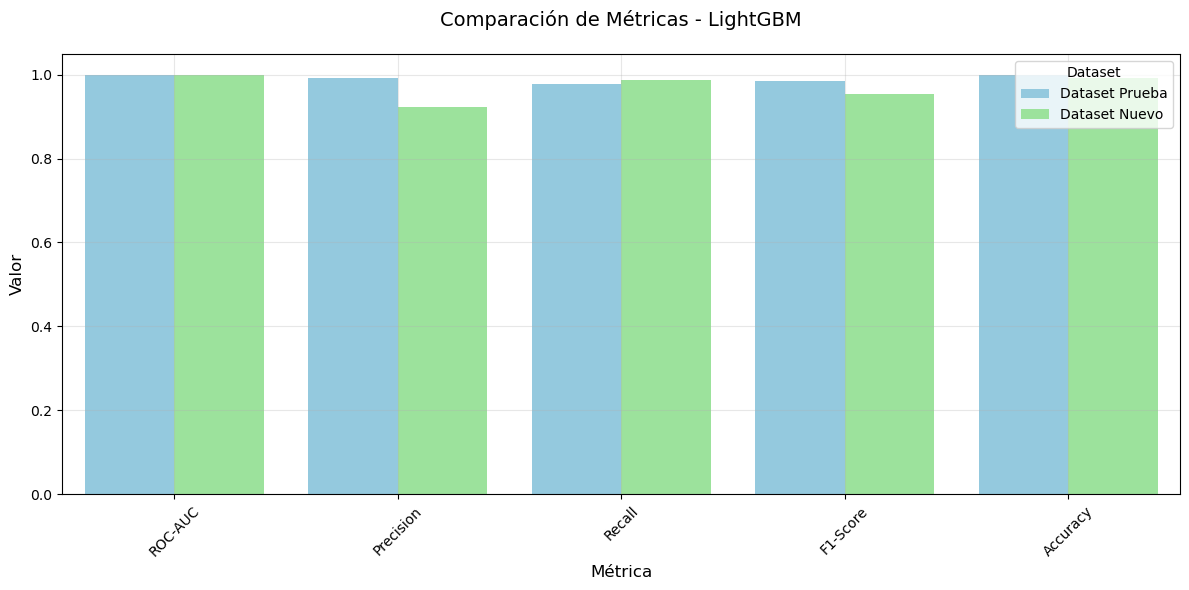

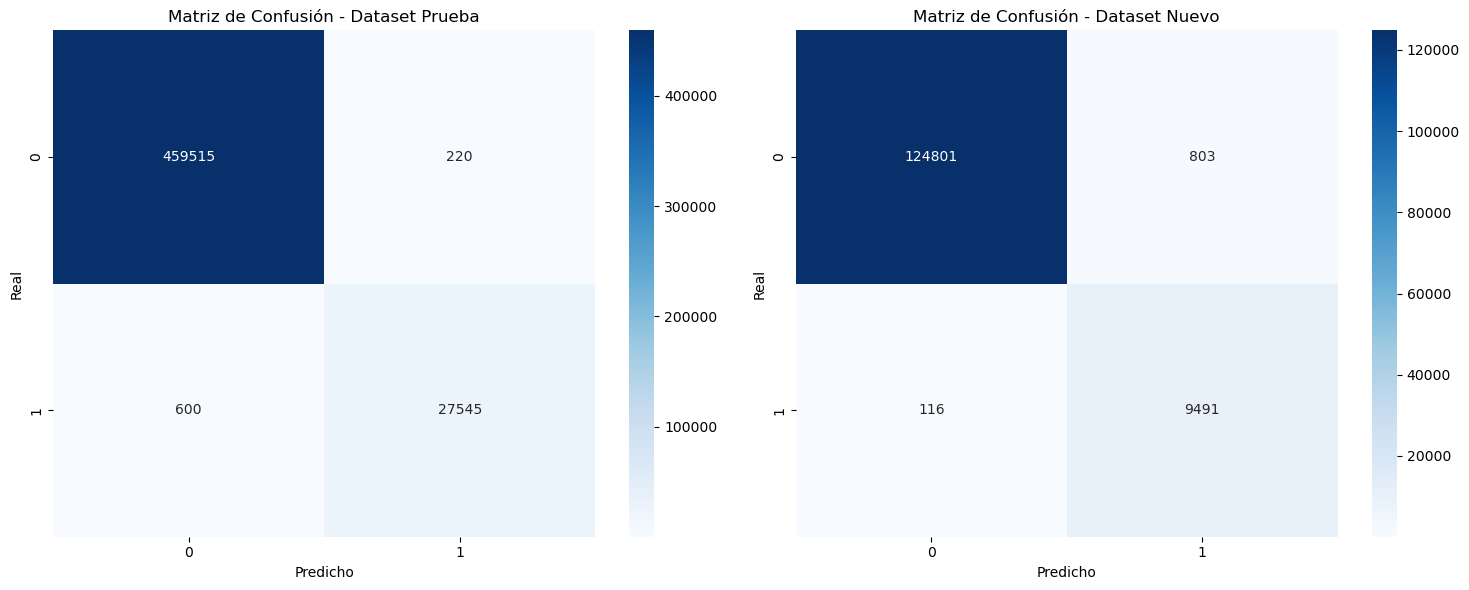


Comparación de Métricas:
     Métrica  Dataset Prueba  Dataset Nuevo  Diferencia
0    ROC-AUC          0.9998         0.9996      0.0002
1  Precision          0.9921         0.9220      0.0701
2     Recall          0.9787         0.9879      0.0092
3   F1-Score          0.9853         0.9538      0.0315
4   Accuracy          0.9983         0.9932      0.0051

Matriz de Confusión - Dataset Prueba:
[[459515    220]
 [   600  27545]]

Matriz de Confusión - Dataset Nuevo:
[[124801    803]
 [   116   9491]]


In [6]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score, 
    accuracy_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets
print("Cargando datos...")
df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/Nuevo/df_mora_prestamospersonales_012024.csv')

# Separar características y variable objetivo
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Configurar modelo con mejores hiperparámetros
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'num_leaves': 127,
    'n_estimators': 900,
    'min_child_samples': 10,
    'max_depth': -1,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'verbose': -1
}

# Entrenar modelo
print("\nEntrenando modelo LightGBM...")
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train, y_train)

def calcular_metricas(y_true, y_pred, y_pred_proba):
    return {
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred)
    }

# Calcular métricas para conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
metricas_test = calcular_metricas(y_test, y_test_pred, y_test_pred_proba)

# Calcular métricas para nuevo dataset
y_nuevo_pred = model.predict(X_nuevo)
y_nuevo_pred_proba = model.predict_proba(X_nuevo)[:, 1]
metricas_nuevo = calcular_metricas(y_nuevo, y_nuevo_pred, y_nuevo_pred_proba)

# Crear DataFrame comparativo
comparacion_metricas = pd.DataFrame({
    'Métrica': list(metricas_test.keys()),
    'Dataset Prueba': list(metricas_test.values()),
    'Dataset Nuevo': list(metricas_nuevo.values()),
    'Diferencia': [abs(metricas_test[m] - metricas_nuevo[m]) for m in metricas_test.keys()]
})
comparacion_metricas = comparacion_metricas.round(4)

# Visualizar comparación de métricas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparacion_metricas.melt(id_vars='Métrica', 
                                  value_vars=['Dataset Prueba', 'Dataset Nuevo']),
    x='Métrica',
    y='value',
    hue='variable',
    palette=['skyblue', 'lightgreen']
)
plt.title('Comparación de Métricas - LightGBM', fontsize=14, pad=20)
plt.xlabel('Métrica', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión - Dataset de prueba
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Dataset Prueba')
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicho')

# Matriz de confusión - Dataset nuevo
cm_nuevo = confusion_matrix(y_nuevo, y_nuevo_pred)
sns.heatmap(cm_nuevo, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Dataset Nuevo')
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicho')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("\nComparación de Métricas:")
print(comparacion_metricas)

print("\nMatriz de Confusión - Dataset Prueba:")
print(cm_test)

print("\nMatriz de Confusión - Dataset Nuevo:")
print(cm_nuevo)

# Guardar solo los resultados numéricos
comparacion_metricas.to_csv('lightgbm_resultados.csv', index=False)

Cargando datos...
Preparando datos...
Entrenando modelo...
Realizando predicciones...


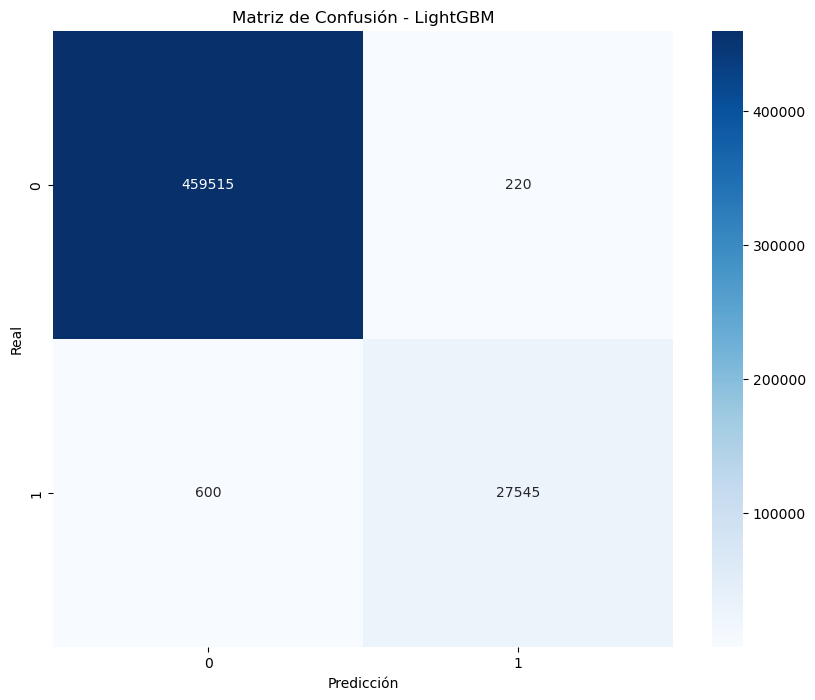


Métricas en conjunto de prueba:
ROC-AUC: 0.9998
Precision: 0.9921
Recall: 0.9787
F1-Score: 0.9853
Accuracy: 0.9983
Especificidad: 0.9995

Tiempo de ejecución: 0:02:01.639167


In [10]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Iniciar el tiempo
start_time = datetime.now()

# Cargar dataset
print("Cargando datos...")
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir los mejores parámetros encontrados
best_params = {
   'subsample': 0.6,
   'reg_lambda': 0.1,
   'reg_alpha': 0.1,
   'num_leaves': 127,
   'n_estimators': 900,
   'min_child_samples': 10,
   'max_depth': -1,
   'learning_rate': 0.05,
   'colsample_bytree': 0.6,
   'objective': 'binary',
   'metric': 'auc',
   'random_state': 42,
   'verbose': -1
}

# Entrenar el modelo con los mejores parámetros
print("Entrenando modelo...")
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones
print("Realizando predicciones...")
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

metrics = {
   'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1-Score': f1_score(y_test, y_pred),
   'Accuracy': accuracy_score(y_test, y_pred),
   'Especificidad': especificidad
}

# Calcular tiempo de ejecución
end_time = datetime.now()
execution_time = end_time - start_time

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - LightGBM')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Imprimir métricas y tiempo de ejecución
print('\nMétricas en conjunto de prueba:')
for metric, value in metrics.items():
   print(f'{metric}: {value:.4f}')

print(f'\nTiempo de ejecución: {execution_time}')

# Guardar los mejores parámetros
pd.DataFrame([best_params]).to_csv('mejores_parametros_lightgbm.csv', index=False)